In [2]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor

import seaborn as sns
import scipy.stats as st

In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.columns = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [5]:
len(df)

253680

In [6]:
df.Diabetes_binary.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_binary, dtype: int64

In [7]:
for i in range(len(df.Diabetes_binary)):
    if df.loc[i,'Diabetes_binary'] > 0:
        df.loc[i,'Diabetes_binary'] = 1

In [7]:
"""df1 = df[df['Diabetes_binary'] == 1]
for i in range(5):
    df1 = pd.concat([df1, df[df['Diabetes_binary'] == 1]],ignore_index=True)
df = pd.concat([df1, df[df['Diabetes_binary'] == 0]],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head()
"""

"df1 = df[df['Diabetes_binary'] == 1]\nfor i in range(5):\n    df1 = pd.concat([df1, df[df['Diabetes_binary'] == 1]],ignore_index=True)\ndf = pd.concat([df1, df[df['Diabetes_binary'] == 0]],ignore_index=True)\ndf = df.sample(frac=1).reset_index(drop=True)\ndf.head()\n"

In [8]:
#df.Diabetes_binary.value_counts()

In [9]:
"""j = 0
for i in list(df[df['Diabetes_binary'] == 0].index):
    df.drop(i,inplace=True)
    j += 1
    if j >218334-35346:
        break
df = df.sample(frac=1).reset_index(drop=True)
df.Diabetes_binary.value_counts()"""

"j = 0\nfor i in list(df[df['Diabetes_binary'] == 0].index):\n    df.drop(i,inplace=True)\n    j += 1\n    if j >218334-35346:\n        break\ndf = df.sample(frac=1).reset_index(drop=True)\ndf.Diabetes_binary.value_counts()"

In [12]:
#extracting x and y
y = df["Diabetes_binary"].values
 
x = df.drop(["Diabetes_binary"], axis=1).values

In [9]:
#spliting  data
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.1,
                                                    shuffle=True)

In [10]:
model_2 = XGBClassifier()

params = {  
                "n_estimators": st.randint(3, 40),
                "max_depth": st.randint(3, 40),
                "learning_rate": st.uniform(0.05, 0.4),
                "colsample_bytree": st.beta(10, 1),
                "subsample": st.beta(10, 1),
                "gamma": st.uniform(0, 10),
                'objective': ['binary:logistic'],
                'scale_pos_weight': st.randint(0, 2),
                "min_child_weight": st.expon(0, 50),

            }

    # Random Search Training with 5 folds Cross Validation
clf2 = RandomizedSearchCV(model_2, params, cv=5,
                             n_jobs=1, n_iter=100) 

clf2.fit(X_train, y_train)  

#model_2.fit(X_train, y_train)  
pred_final = clf2.predict(X_test)

cm = confusion_matrix(y_test, pred_final)
sns.set(rc={"figure.figsize":(4, 2)})
sns.heatmap(cm, annot=True)

print(accuracy_score(y_test, pred_final))

KeyboardInterrupt: 

In [ ]:
model_1 = RandomForestClassifier()

k_fold_cv = 5 
params = {
 "n_estimators" : [10,50,100],
 "max_features" : ["auto", "log2", "sqrt"],
 "bootstrap" : [True, False]
 }
clf1 = RandomizedSearchCV(model_1, param_distributions=params, cv=k_fold_cv,
 n_iter = 5, scoring="accuracy",verbose=2, random_state=42,
 n_jobs=-1, return_train_score=True)
clf1.fit(X_train, y_train)

pred_final = clf1.predict(X_test)
cm = confusion_matrix(y_test, pred_final)
sns.set(rc={"figure.figsize":(4, 2)})
sns.heatmap(cm, annot=True)

print(accuracy_score(y_test, pred_final))

/home/exam1/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.847760958688111


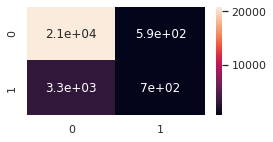

In [11]:

model_3 = LogisticRegression(max_iter=800)
model_3.fit(X_train,y_train)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }


clf3 = RandomizedSearchCV(model_3, params, cv=5,
                         n_jobs=1, n_iter=100) 

clf3.fit(X_train, y_train)

pred_final = clf3.predict(X_test)
cm = confusion_matrix(y_test, pred_final)
sns.set(rc={"figure.figsize":(4, 2)})
sns.heatmap(cm, annot=True)

print(accuracy_score(y_test, pred_final))